In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
words = "/content/gdrive/My Drive/tools/word_data.pkl"

In [4]:
authors = "/content/gdrive/My Drive/tools/email_authors.pkl"

In [5]:
import pandas as pd
import pickle

In [6]:
authors_file =  pd.read_pickle(authors)
words_file = pd.read_pickle(words)

In [7]:
x = words_file

In [8]:
y = authors_file

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

In [12]:
### text vectorization--go from strings to lists of numbers
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed  = vectorizer.transform(X_test)

In [13]:
### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
selector = SelectPercentile(f_classif, percentile=30)
selector.fit(X_train_transformed, y_train)
X_train_transformed = selector.transform(X_train_transformed).toarray()
X_test_transformed  = selector.transform(X_test_transformed).toarray()

In [14]:
### info on the data
print("no. of Chris training emails:", sum(y_train))
print("no. of Sara training emails:", len(y_train)-sum(y_train))

no. of Chris training emails: 6161
no. of Sara training emails: 6143


In [15]:
from sklearn.svm import SVC


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [17]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_transformed, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
svc_predicted = svclassifier.predict(X_test_transformed)

SVC Score: 
 99.47
SVC Test Score: 
 98.46
Accuracy: 
 0.984641638225256
[[2585   49]
 [  32 2608]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2634
           1       0.98      0.99      0.98      2640

    accuracy                           0.98      5274
   macro avg       0.98      0.98      0.98      5274
weighted avg       0.98      0.98      0.98      5274



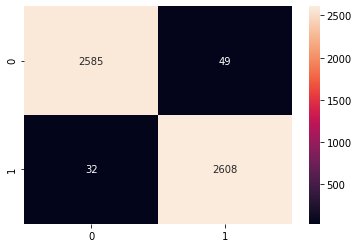

In [20]:
svc_score = round(svclassifier.score(X_train_transformed, y_train) * 100, 2)
svc_score_test = round(svclassifier.score(X_test_transformed, y_test) * 100, 2)
print('SVC Score: \n', svc_score)
print('SVC Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test, svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

sns.heatmap(confusion_matrix(y_test,svc_predicted),annot=True,fmt="d")